In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2
import subgrid_parameterization.preprocess.saminterface as sam

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [ ]:
path0 = "/glade/work/stepheba/les_and_clubb_benchmark_runs/stepheba_sam_runs/derecho/"

path = "sam-bomex/"
file = "BOMEX_64x64x75_100m_40m_1s"

In [ ]:
ds = xr.open_dataset(path0 + path + file + ".nc")

In [ ]:
z_sam = np.asarray(ds["z"], dtype=np.float64)
nzm = (len(z_sam) + 1) // 2
if np.isclose(2.0 * z_sam[0], z_sam[1]):
    zm = np.concatenate(([0], z_sam[2 : 2 * nzm - 1 : 2]))
    print("Combined staggered grids")
else:
    zm = np.concatenate(
        ([0], 0.5 * (z_sam[1 : 2 * nzm - 1 : 2] + z_sam[2 : 2 * nzm - 1 : 2]))
    )
grids = sam.CLUBBGrids.from_momentum_grid(zm)
sam_ds = sam.SAMDataInterface(ds, grids)

In [ ]:
u2 = sam_ds.get_sam_variable_on_clubb_grid("U2", "zt")
v2 = sam_ds.get_sam_variable_on_clubb_grid("V2", "zt")
w2 = sam_ds.get_sam_variable_on_clubb_grid("W2", "zt")
e = 0.5 * (u2 + v2 + w2)

In [ ]:
disp = sam_ds.get_disp()

# U2DFSN = sam.stagger_var("U2DFSN", ds, grids.zt)
# V2DFSN = sam.stagger_var("V2DFSN", ds, grids.zt)
# assert ( disp == (0.5 * ( U2DFSN + V2DFSN ))).all()

In [ ]:
C14 = sam_ds.get_C14()
L, Lup, Ldown = sam_ds.get_mixing_length()

# assert (C14 == (-3.0 / 2.0 * L / e**1.5 * disp) ).all()

No programtic way to asses spinup (yet), can be assessed visually:

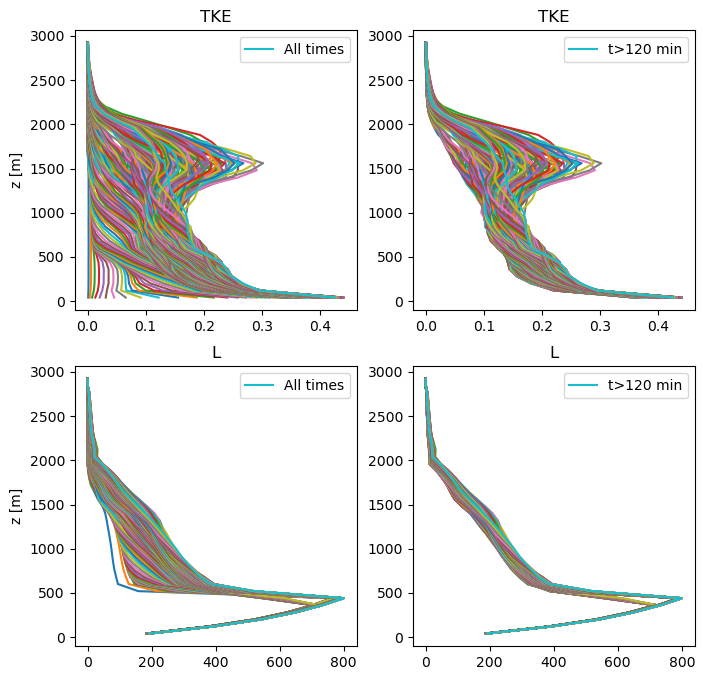

In [ ]:
istart = 120
ngrdcol = e.shape[0]
itime = range(istart, ngrdcol)
kstart = 0
kend = nzm  # -21 #int(0.75*nzm)
try:
    del (fig, axs)
    print("deleted old figure")
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
except:
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 0].plot(e[:-1, kstart:kend].T, grids.zt[kstart:kend].T)
axs[0, 0].plot(e[-1, kstart:kend].T, grids.zt[kstart:kend].T, label="All times")
axs[0, 0].legend()
axs[0, 0].set_ylabel("z [m]")
axs[0, 0].set_title("TKE")
axs[0, 1].plot(e[itime[:-1], kstart:kend].T, grids.zt[kstart:kend].T)
axs[0, 1].plot(
    e[itime[-1], kstart:kend].T,
    grids.zt[kstart:kend].T,
    label="t>" + str(istart) + " min",
)
axs[0, 1].legend()
axs[0, 1].set_title("TKE")
axs[1, 0].plot(L[:-1, kstart:kend].T, grids.zt[kstart:kend].T)
axs[1, 0].plot(L[-1, kstart:kend].T, grids.zt[kstart:kend].T, label="All times")
axs[1, 0].legend()
axs[1, 0].set_ylabel("z [m]")
axs[1, 0].set_title("L")
axs[1, 1].plot(L[itime[:-1], kstart:kend].T, grids.zt[kstart:kend].T)
axs[1, 1].plot(
    L[itime[-1], kstart:kend].T,
    grids.zt[kstart:kend].T,
    label="t>" + str(istart) + " min",
)
axs[1, 1].legend()
axs[1, 1].set_title("L");

In [ ]:
print(np.sum(C14 < 0))
print(np.sum(C14 == 0))
print(np.sum(C14 > 0))
print(np.sum(C14 > 2))

219
3486
9615
353


In [ ]:
print(np.sum(disp < 0))
print(np.sum(disp == 0))
print(np.sum(disp > 0))

9615
3486
219


In [ ]:
print(np.sum(e < 0))
print(np.sum(e == 0))
print(np.sum(e >= 0))

0
0
13320


Negative and zero C14 are entirely due to dissipation, while TKE is always positive as it should be.

deleted old figure


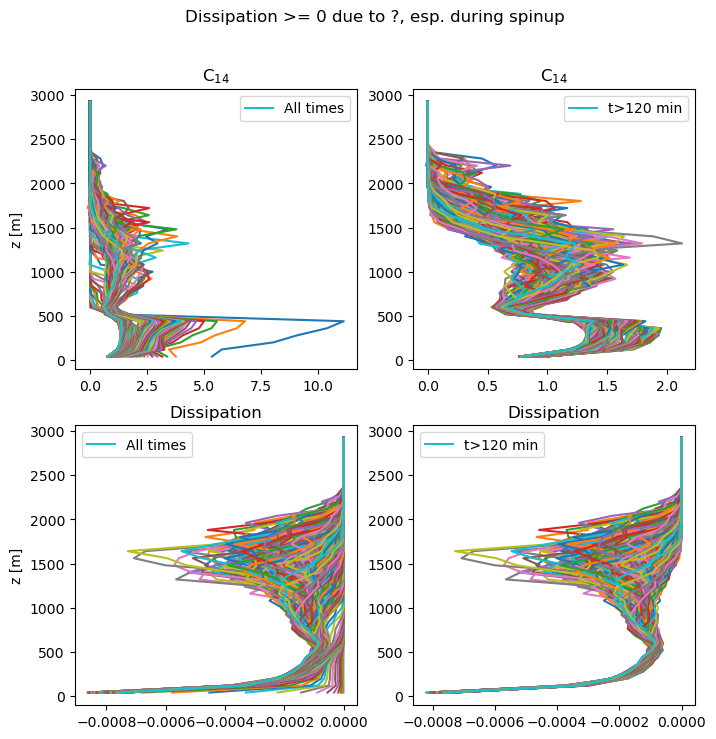

In [ ]:
try:
    del (fig, axs)
    print("deleted old figure")
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
except:
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 0].plot(C14[:-1, kstart:kend].T, grids.zt[kstart:kend].T)
axs[0, 0].plot(C14[-1, kstart:kend].T, grids.zt[kstart:kend].T, label="All times")
axs[0, 0].legend()
axs[0, 0].set_ylabel("z [m]")
axs[0, 0].set_title(r"C$_{14}$")
axs[0, 1].plot(C14[itime[:-1], kstart:kend].T, grids.zt[kstart:kend].T)
axs[0, 1].plot(
    C14[itime[-1], kstart:kend].T,
    grids.zt[kstart:kend].T,
    label="t>" + str(istart) + " min",
)
axs[0, 1].legend()
axs[0, 1].set_title(r"C$_{14}$")
axs[1, 0].plot(disp[:-1, kstart:kend].T, grids.zt[kstart:kend].T)
axs[1, 0].plot(disp[-1, kstart:kend].T, grids.zt[kstart:kend].T, label="All times")
#     U2DFSN[itime, kstart:kend].T, grids.zt[itime, kstart:kend].T, "-"
# )  # ,label='U2DFSN')
# plt.plot(
#     V2DFSN[itime, kstart:kend].T, grids.zt[itime, kstart:kend].T, "--"
# )  # label='V2DFSN')
axs[1, 0].legend()
axs[1, 0].set_ylabel("z [m]")
axs[1, 0].set_title("Dissipation")
axs[1, 1].plot(disp[itime[:-1], kstart:kend].T, grids.zt[kstart:kend].T)
axs[1, 1].plot(
    disp[itime[-1], kstart:kend].T,
    grids.zt[kstart:kend].T,
    label="t>" + str(istart) + " min",
)
axs[1, 1].legend()
axs[1, 1].set_title("Dissipation")
fig.suptitle("Dissipation >= 0 due to ?, esp. during spinup");

Issue of dissipation = 0 = C14 remains at model top, regardless of spinup exclusion. Need clipping + no spinup.

In [ ]:
C14_nonNeg = C14[C14 >= 0]
C14_pos = C14[C14 > 0]

The maximum of C14 set a mimimum for TKE, to avoiding division by near zero. The minimum of C14, sets a minimum for dissipation to elimiate the unexplained but negative dissipation in the LES output (associated with the top boudnary and worse at early times pointing to the sponge layer as the cause, but this is uncomfirmed).

In [ ]:
C14min = 0.2
C14max = 2
minMask = disp < -2 / 3 * C14min / L * e**1.5
maxMask = e > (-1.5 * disp * L / C14max) ** (2 / 3)
C14_clip = C14[minMask & maxMask]

/glade/derecho/scratch/adac/tmp/ipykernel_55475/1087768823.py:4: RuntimeWarning: invalid value encountered in power
  maxMask = e > (-1.5 * disp * L / C14max) ** (2 / 3)


Text(0.5, 0, 'C$_{14}$')

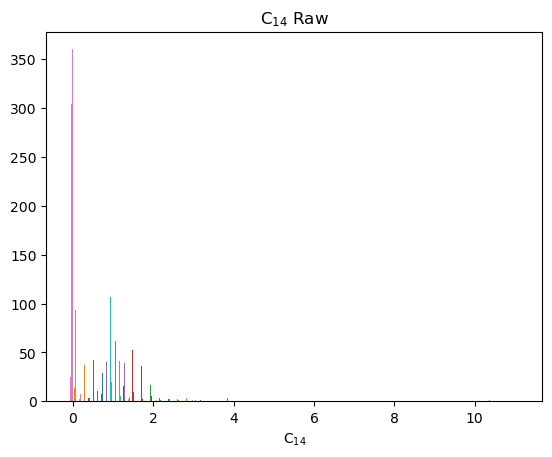

In [ ]:
plt.hist(C14, bins=100)
plt.title(r"C$_{14}$ Raw")
plt.xlabel(r"C$_{14}$")
# plt.ylabel("Count")

Text(0, 0.5, 'Count')

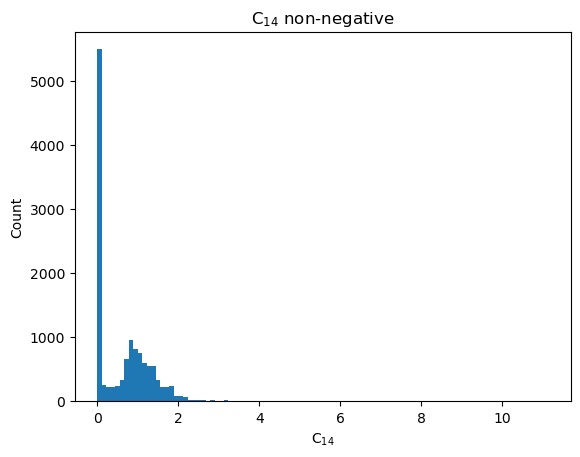

In [ ]:
plt.hist(C14_nonNeg, bins=100)
# plt.ylim((0, 6000))
plt.title(r"C$_{14}$ non-negative")
plt.xlabel(r"C$_{14}$")
plt.ylabel("Count")

Text(0.5, 0.98, 'C$_{14}$ positive')

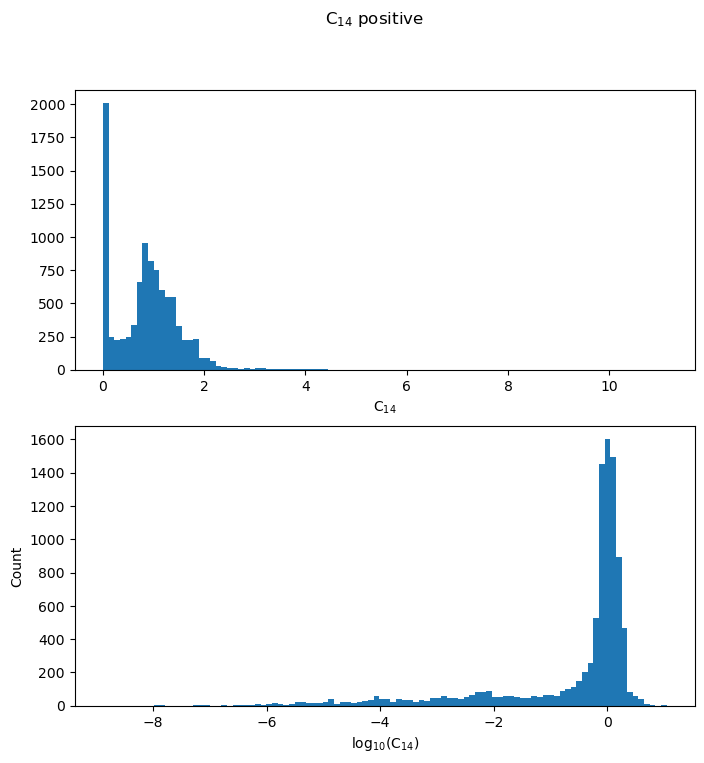

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].hist(C14_pos, bins=100)
# axs[0].set_ylim((0, 6000))
axs[0].set_xlabel(r"C$_{14}$")
axs[1].hist(np.log10(C14_pos), bins=100)
axs[1].set_xlabel(r"log$_{10}$(C$_{14}$)")
plt.ylabel("Count")
fig.suptitle(r"C$_{14}$ positive")

Text(0, 0.5, 'Count')

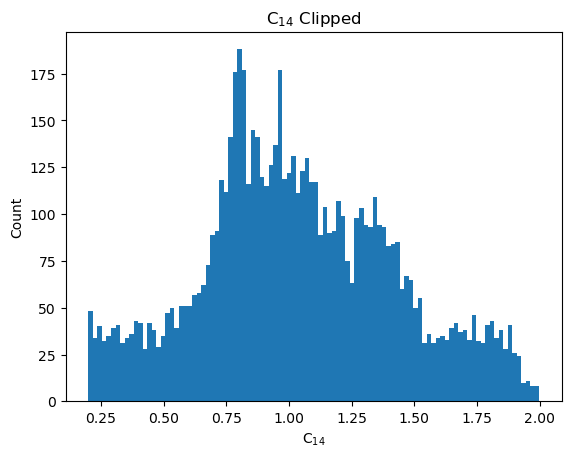

In [ ]:
plt.hist(C14_clip, bins=100)
# plt.ylim((0, 2000))
plt.title(r"C$_{14}$ Clipped")
plt.xlabel(r"C$_{14}$")
plt.ylabel("Count")

Not setting the lower bound to C$_{14}$>0 by dissipation < 0, but by a dynamic tolerance on dissipation based on the minimum C$_{14} \neq$ 0 but $\approx$0.2 minimum in CLUBB documentation tuning parameters table. 

In [ ]:
print(np.mean(C14))
print(np.mean(C14_nonNeg))
print(np.mean(C14_pos))
print(np.mean(C14_clip))

0.6279929257994225
0.6385170718426396
0.8700168651284887
1.0378389790557334
